<a href="https://colab.research.google.com/github/gunduzl/assistantCreator/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np  # Explicitly import numpy

# Fetch dataset
online_retail = fetch_ucirepo(id=352)  # UC Irvine Machine Learning Repository dataset

# Data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# Combine features and targets into a single dataframe for better analysis
df = pd.concat([X, y], axis=1)

# Display metadata and variable information
print("Metadata:")
print(online_retail.metadata)
print("\nVariables Information:")
print(online_retail.variables)

# Basic dataset exploration
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types of all columns
print("\nData types of each column:")
print(df.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
numerical_stats = df.describe(include=[np.number])
print(numerical_stats)

# Summary statistics for all columns (including categorical ones)
print("\nSummary statistics for all columns:")
all_columns_stats = df.describe(include='all')
print(all_columns_stats)

# Saving the statistics to CSV files for later analysis
numerical_stats.to_csv("numerical_summary_statistics.csv", index=True)
all_columns_stats.to_csv("all_columns_summary_statistics.csv", index=True)


Metadata:
{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based custome

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
online_retail = fetch_ucirepo(id=352)

# Data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# Combine features and targets into a single dataframe for better analysis
df = pd.concat([X, y], axis=1)

# Display metadata and variable information
print(online_retail.metadata)
print(online_retail.variables)

# Basic dataset exploration
print("First 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types of columns
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

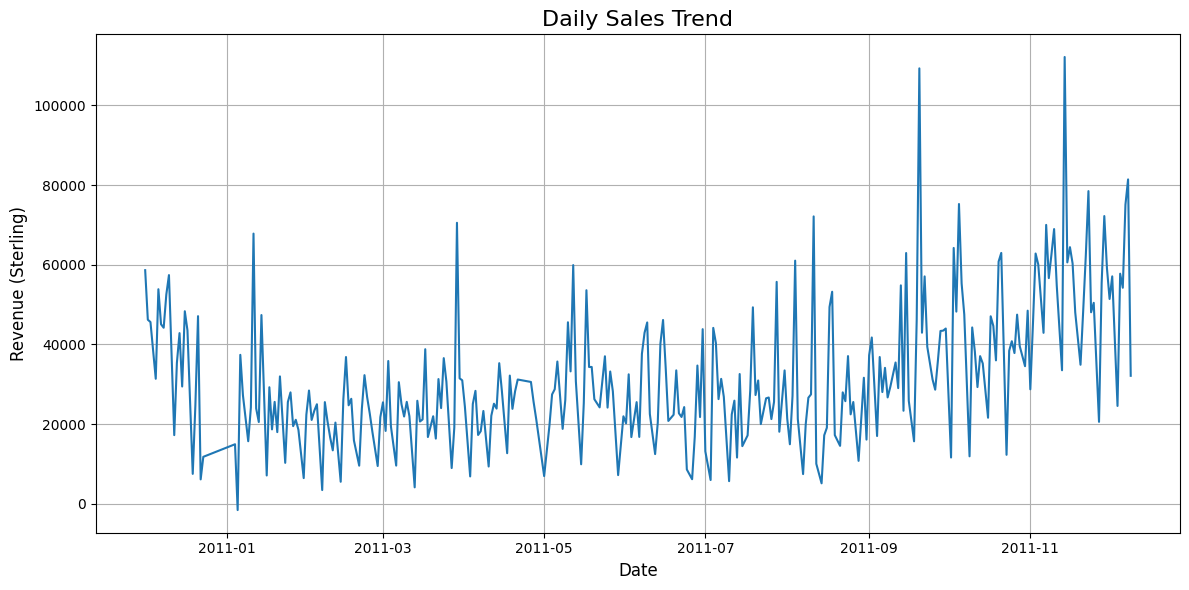

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert InvoiceDate to datetime and extract date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date

# Group by Date to calculate daily revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
daily_sales = df.groupby('Date')['Revenue'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue (Sterling)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

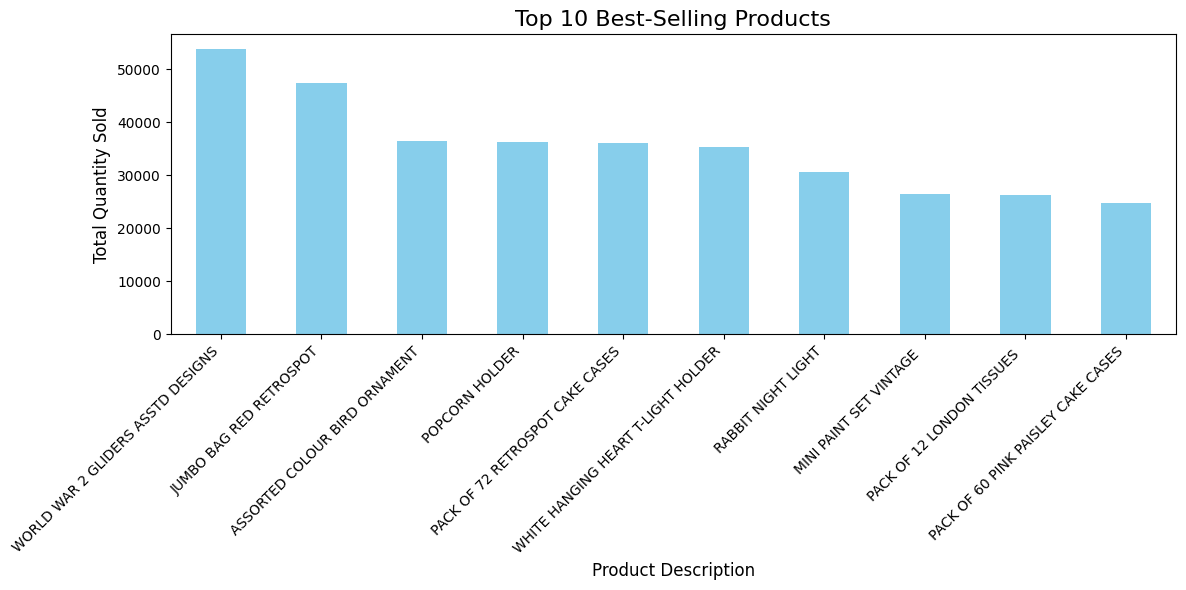

In [ ]:
# Group by product description to calculate total quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 best-selling products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

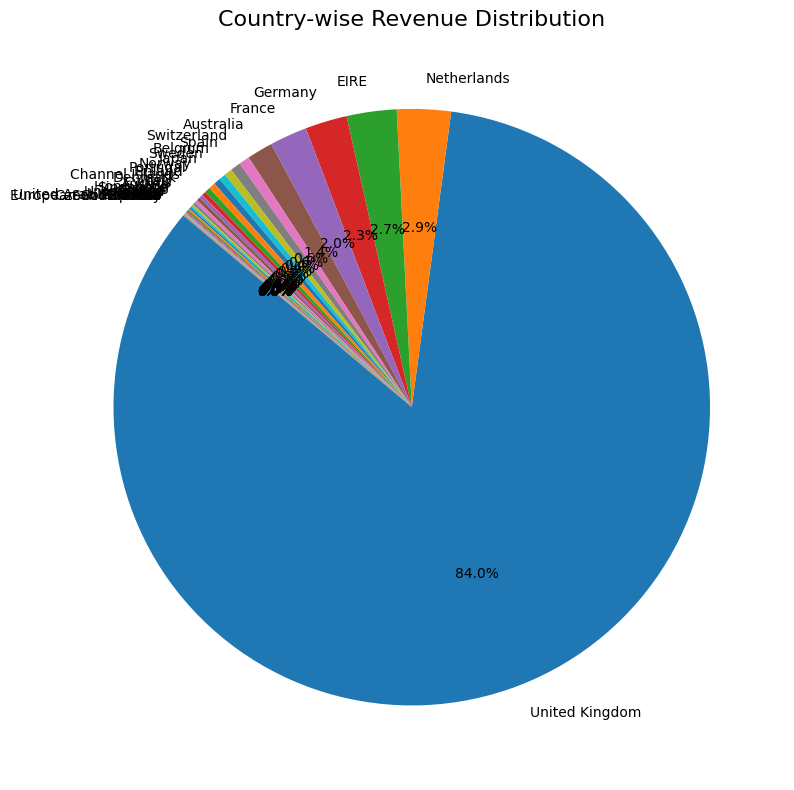

In [ ]:
# Calculate revenue by country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(10, 8))
country_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Country-wise Revenue Distribution", fontsize=16)
plt.ylabel("")  # Hide the default y-axis label
plt.tight_layout()
plt.show()

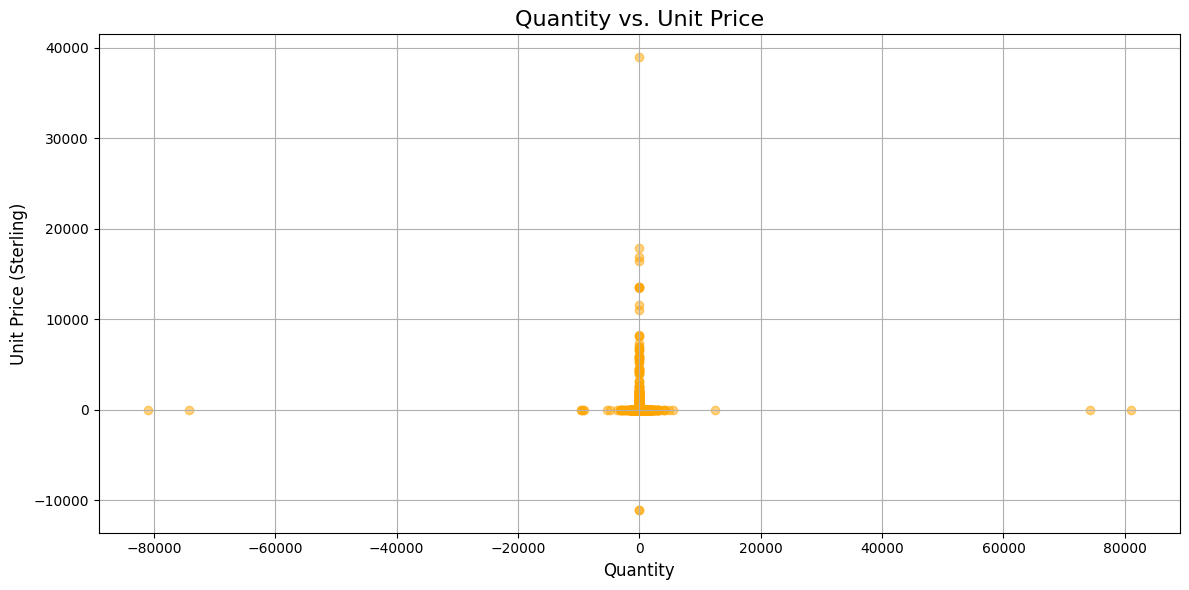

In [ ]:
# Scatter plot for quantity vs. unit price
plt.figure(figsize=(12, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5, color='orange')
plt.title("Quantity vs. Unit Price", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Unit Price (Sterling)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

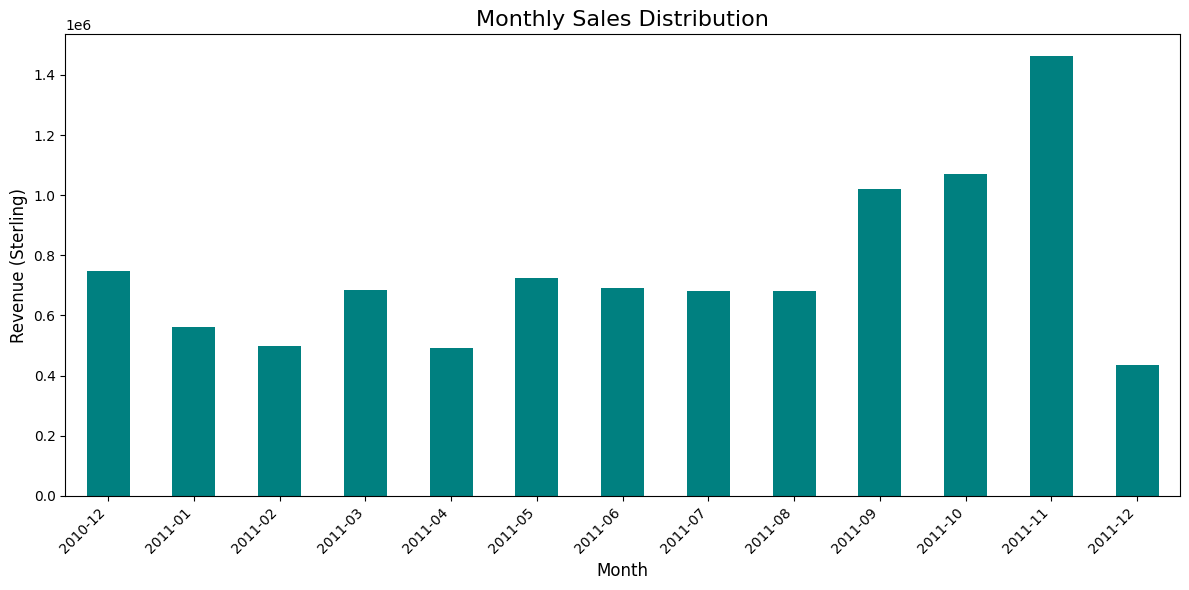

In [ ]:
# Extract year and month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth to calculate monthly revenue
monthly_sales = df.groupby('YearMonth')['Revenue'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title("Monthly Sales Distribution", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (Sterling)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

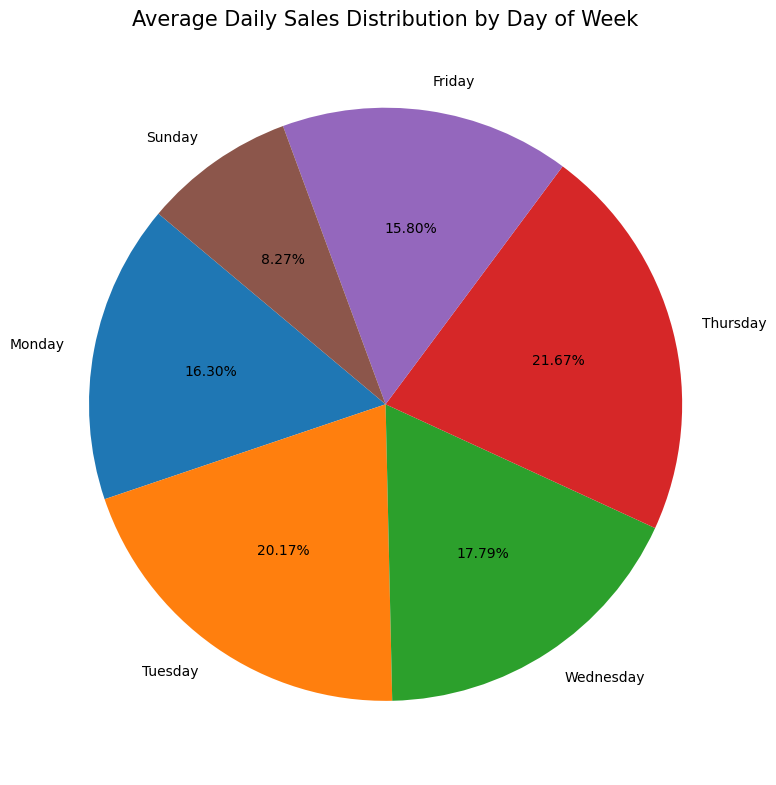

In [ ]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day of the week from InvoiceDate
df['Day of Week'] = df['InvoiceDate'].dt.day_name()

# Calculate total revenue for each day of the week
RevenueByDayOfWeek = df.groupby('Day of Week')['Revenue'].sum()

# Filter out days with zero revenue
RevenueByDayOfWeek = RevenueByDayOfWeek[RevenueByDayOfWeek > 0]

# Calculate the percentage distribution of sales by day of the week
RevenueByDayOfWeekPercentage = RevenueByDayOfWeek / RevenueByDayOfWeek.sum() * 100

# Sort by the weekday order for proper display
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
RevenueByDayOfWeekPercentage = RevenueByDayOfWeekPercentage.reindex(weekday_order).dropna()

# Plot the pie chart
plt.figure(figsize=(8, 8))
RevenueByDayOfWeekPercentage.plot(kind='pie', autopct='%.2f%%', startangle=140)
plt.title('Average Daily Sales Distribution by Day of Week', fontsize=15)
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

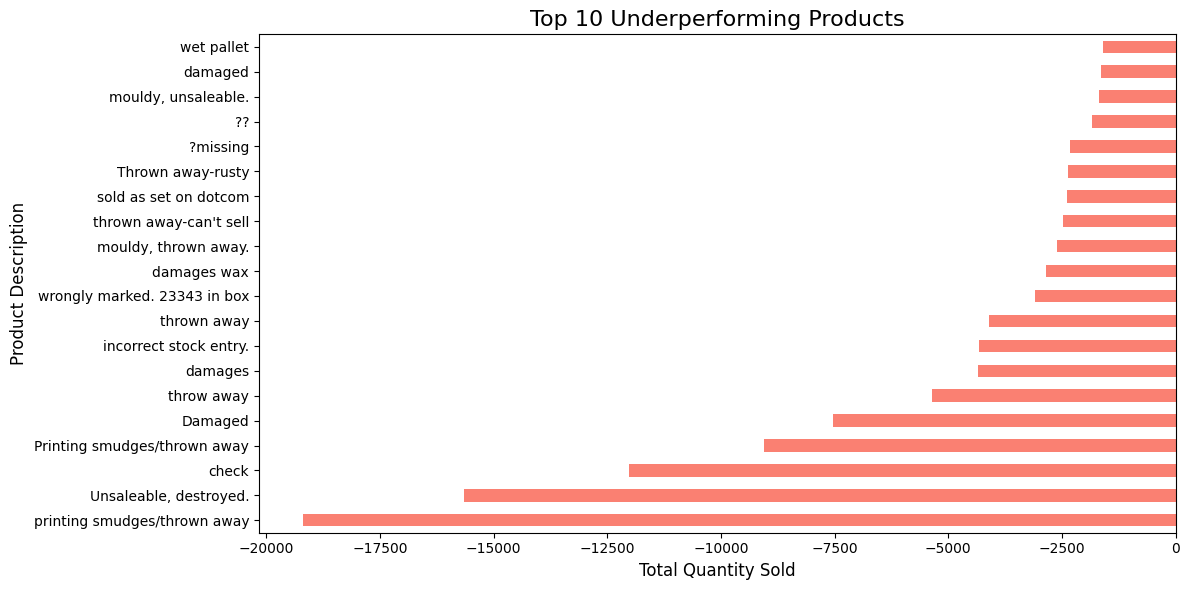

In [ ]:
import matplotlib.pyplot as plt

# Group by product description to calculate total quantity sold
underperforming_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(20)

# Plot the top 10 underperforming products
plt.figure(figsize=(12, 6))
underperforming_products.plot(kind='barh', color='salmon')
plt.title("Top 10 Underperforming Products", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.tight_layout()
plt.show()

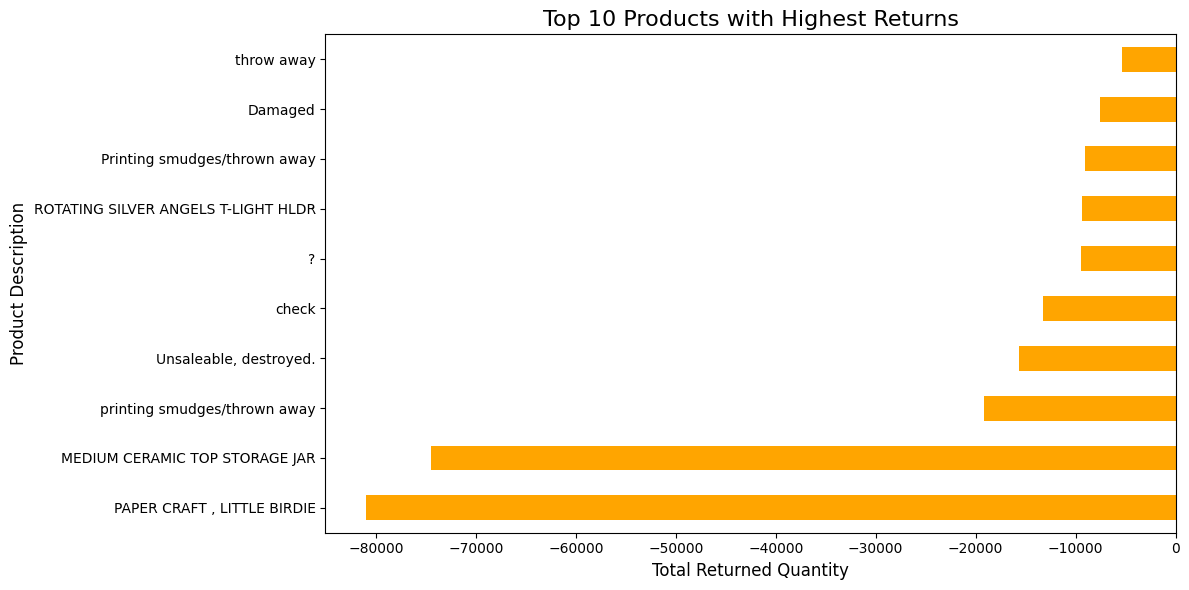

In [ ]:
# Filter negative quantities (returns or adjustments)
returns = df[df['Quantity'] < 0]

# Group by product description and sum up the quantities
top_returns = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Plot the top 10 returned products
plt.figure(figsize=(12, 6))
top_returns.plot(kind='barh', color='orange')
plt.title("Top 10 Products with Highest Returns", fontsize=16)
plt.xlabel("Total Returned Quantity", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.tight_layout()
plt.show()

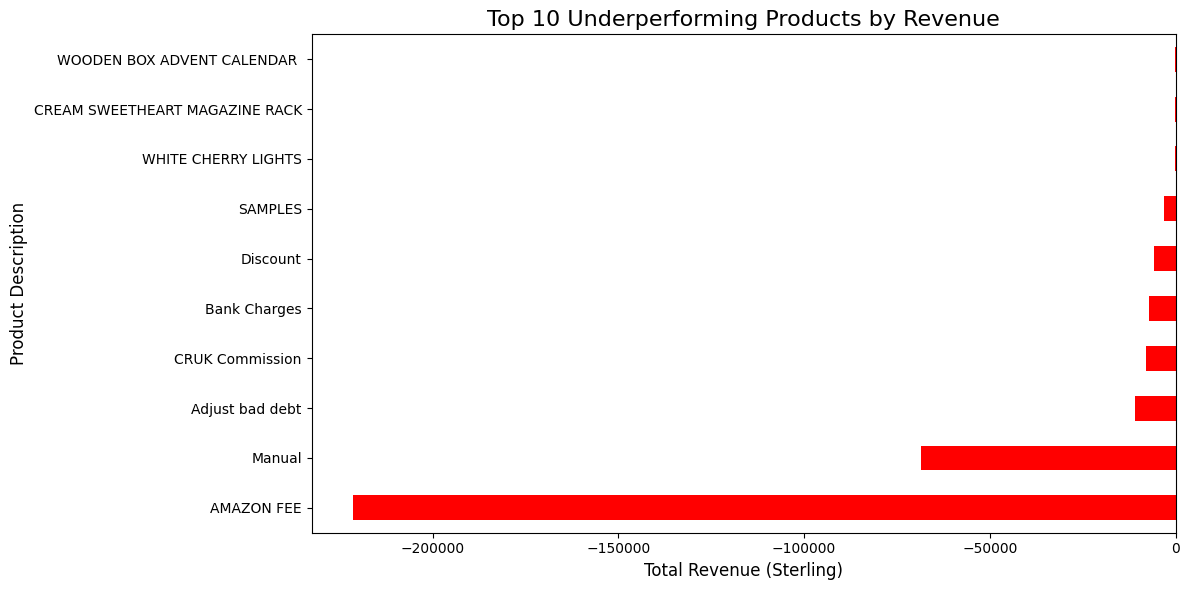

In [ ]:
# Calculate revenue per product and sort for underperformers
underperforming_revenue_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=True).head(10)

# Plot the underperforming products by revenue
plt.figure(figsize=(12, 6))
underperforming_revenue_products.plot(kind='barh', color='red')
plt.title("Top 10 Underperforming Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue (Sterling)", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.tight_layout()
plt.show()

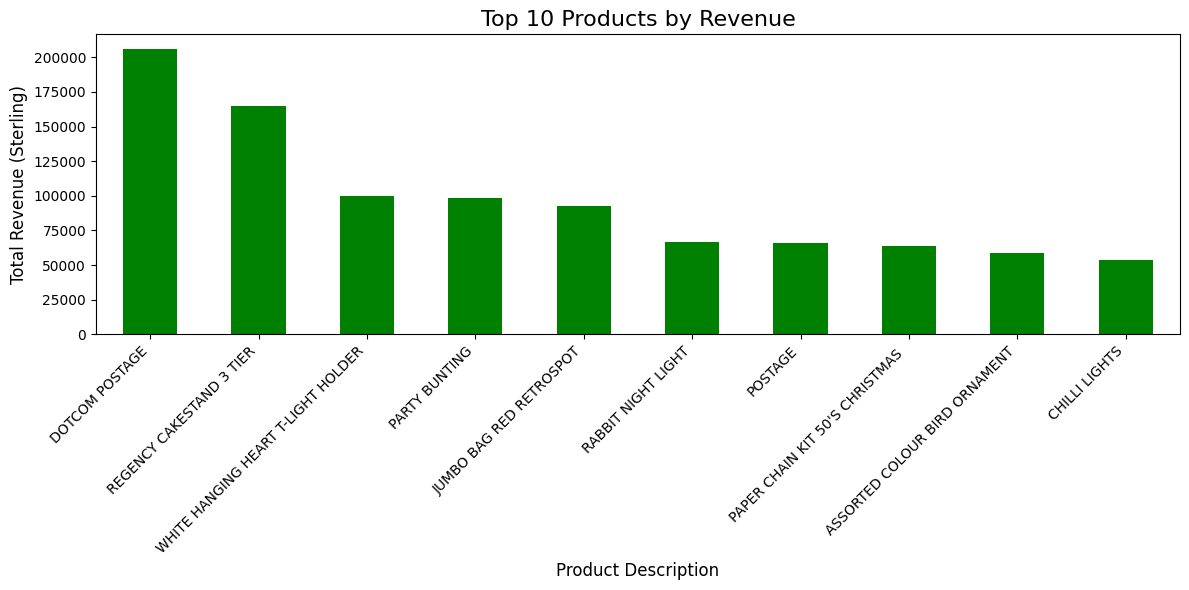

In [ ]:
# Calculate revenue per product
df['Revenue'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products by revenue
plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', color='green')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Total Revenue (Sterling)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

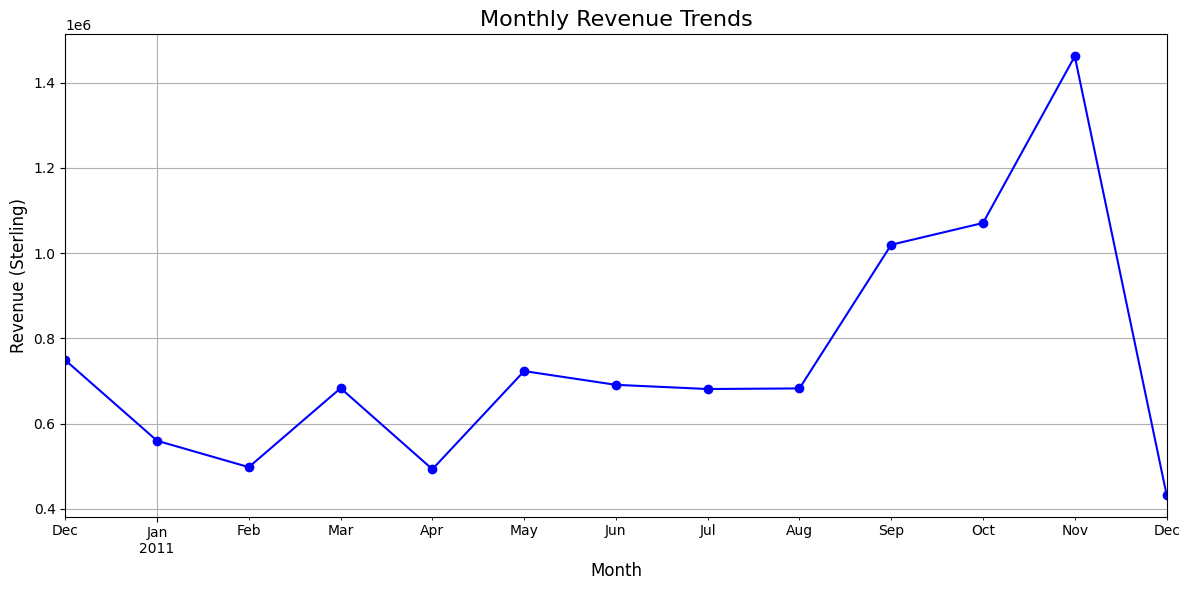

In [ ]:
# Extract year and month for seasonal analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', color='blue', marker='o')
plt.title("Monthly Revenue Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (Sterling)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

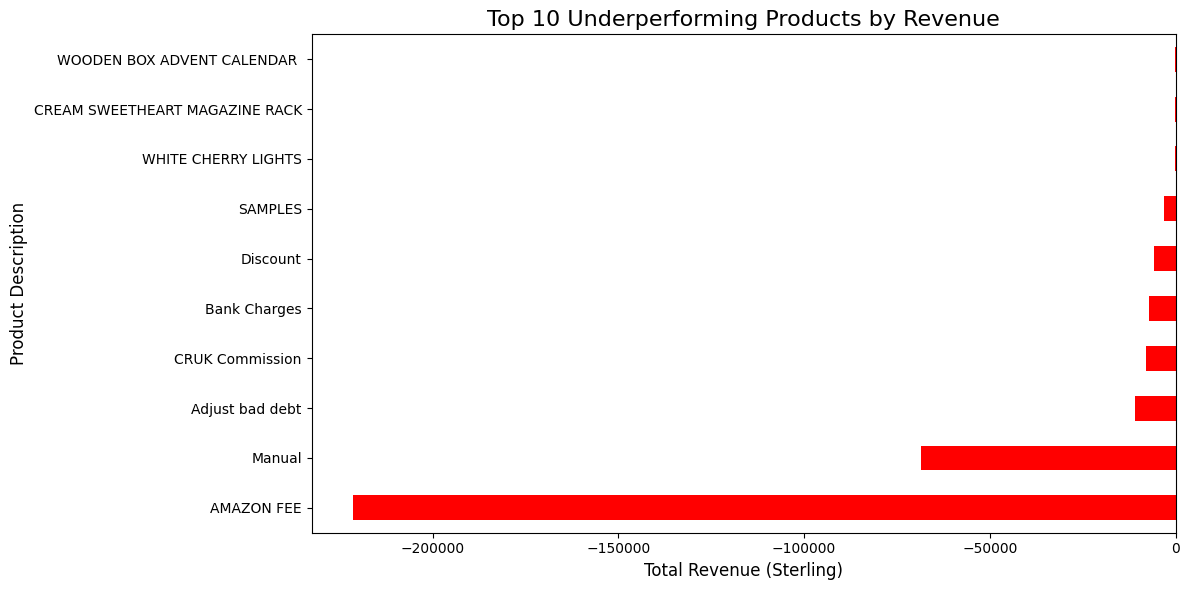

In [ ]:
# Calculate revenue for each product
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Identify the top 10 underperforming products by revenue
underperforming_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=True).head(10)

# Plot the graph
plt.figure(figsize=(12, 6))
underperforming_revenue.plot(kind='barh', color='red')
plt.title("Top 10 Underperforming Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue (Sterling)", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.tight_layout()
plt.show()

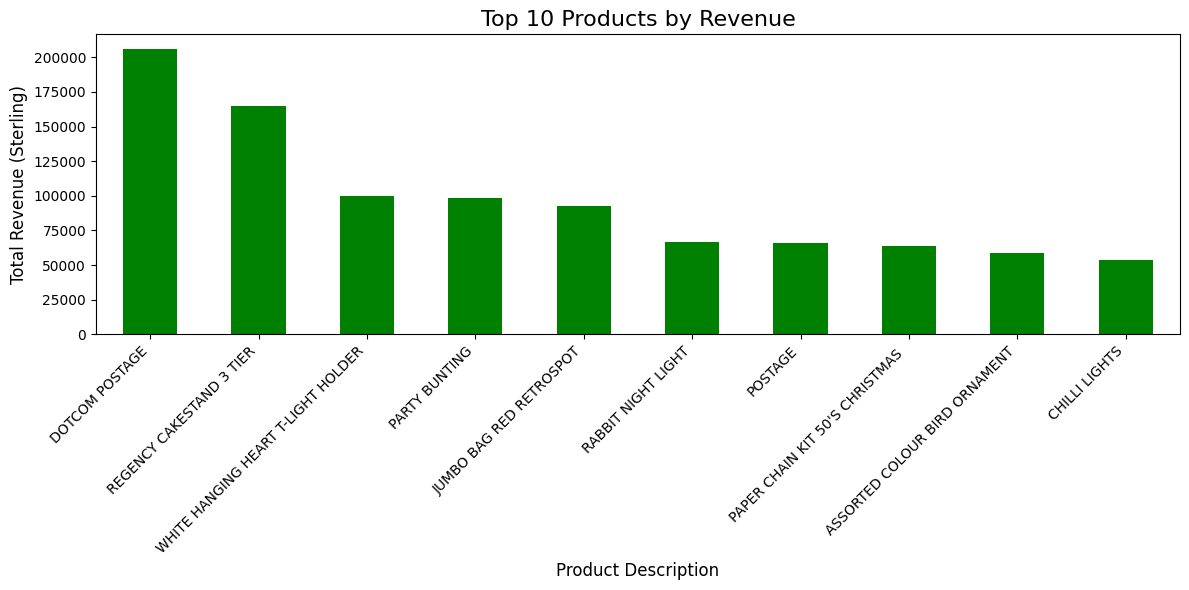

In [ ]:
# Identify the top 10 products generating the most revenue
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot the graph
plt.figure(figsize=(12, 6))
top_revenue.plot(kind='bar', color='green')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Total Revenue (Sterling)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

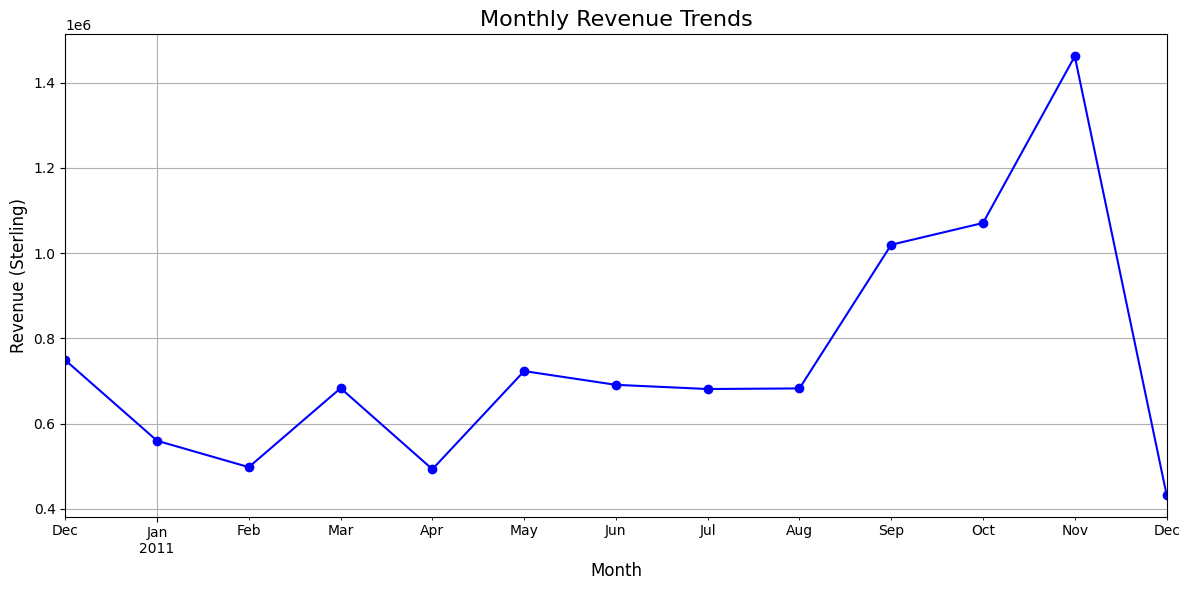

In [ ]:
# Extract year and month for seasonal analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

# Plot the monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', color='blue', marker='o')
plt.title("Monthly Revenue Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (Sterling)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

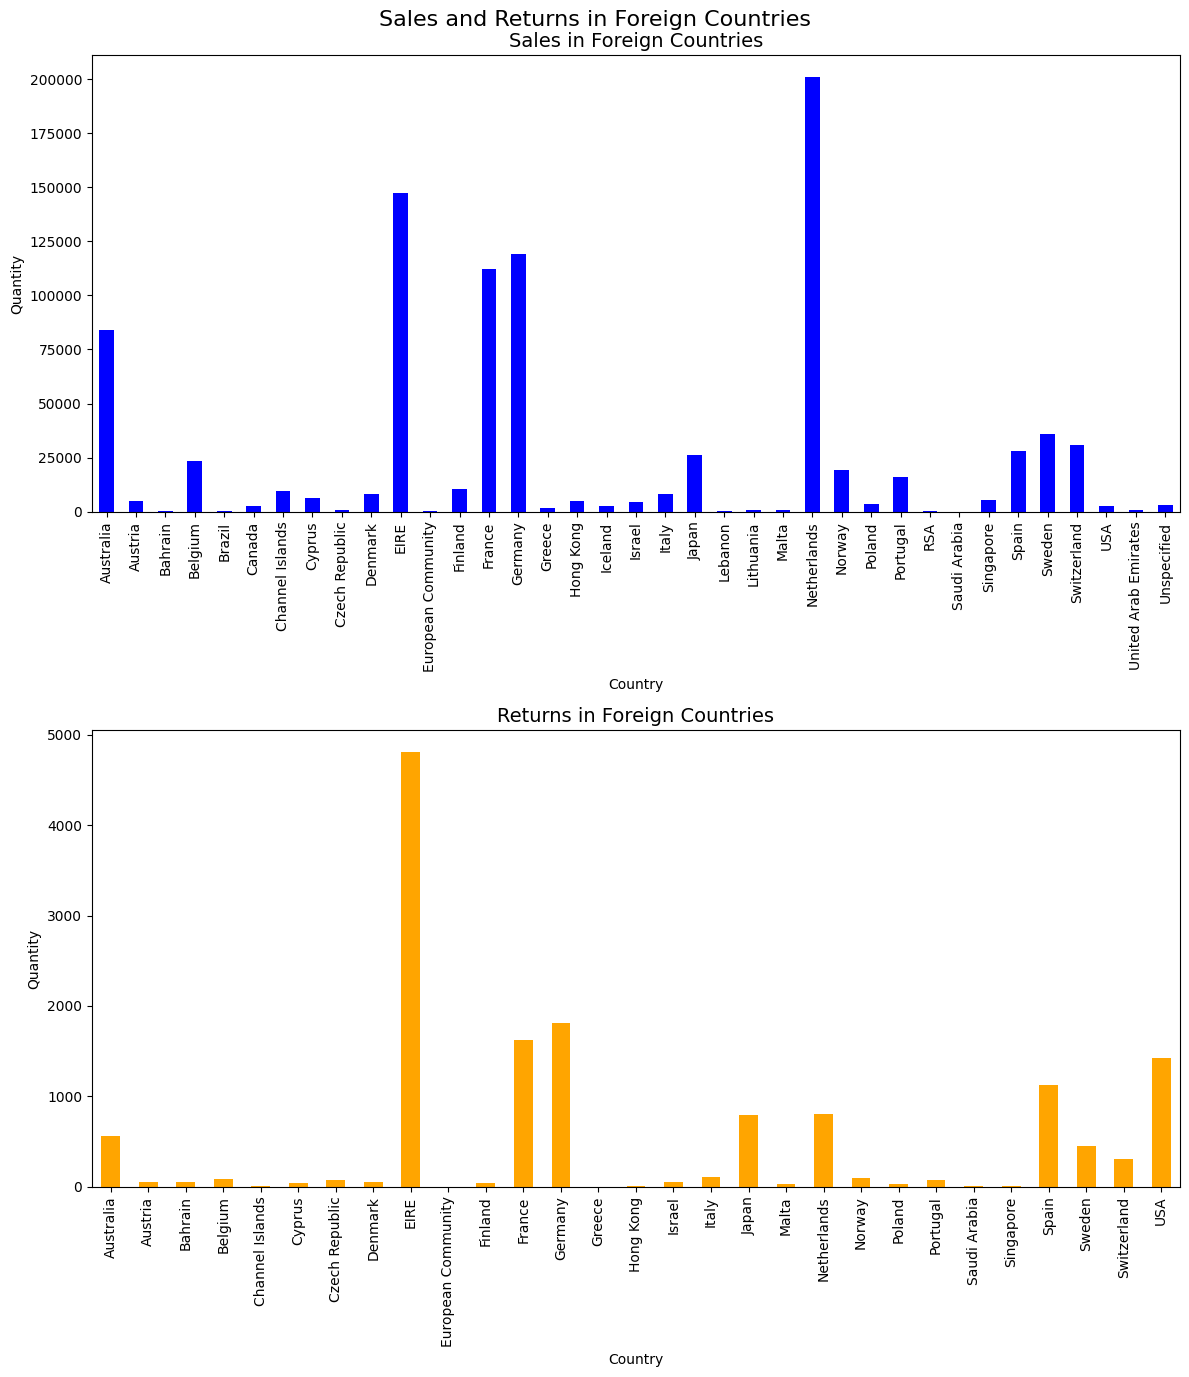

In [ ]:
# Filter out 'United Kingdom' and calculate sales and returns by country
foreign_sales = df[df['Country'] != 'United Kingdom']
sales_by_country = foreign_sales[foreign_sales['Quantity'] > 0].groupby('Country')['Quantity'].sum()
returns_by_country = foreign_sales[foreign_sales['Quantity'] < 0].groupby('Country')['Quantity'].sum().abs()

# Plot sales and returns by country
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
sales_by_country.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title("Sales in Foreign Countries", fontsize=14)
ax1.set_ylabel("Quantity")
returns_by_country.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title("Returns in Foreign Countries", fontsize=14)
ax2.set_ylabel("Quantity")
plt.suptitle("Sales and Returns in Foreign Countries", fontsize=16)
plt.tight_layout()
plt.show()

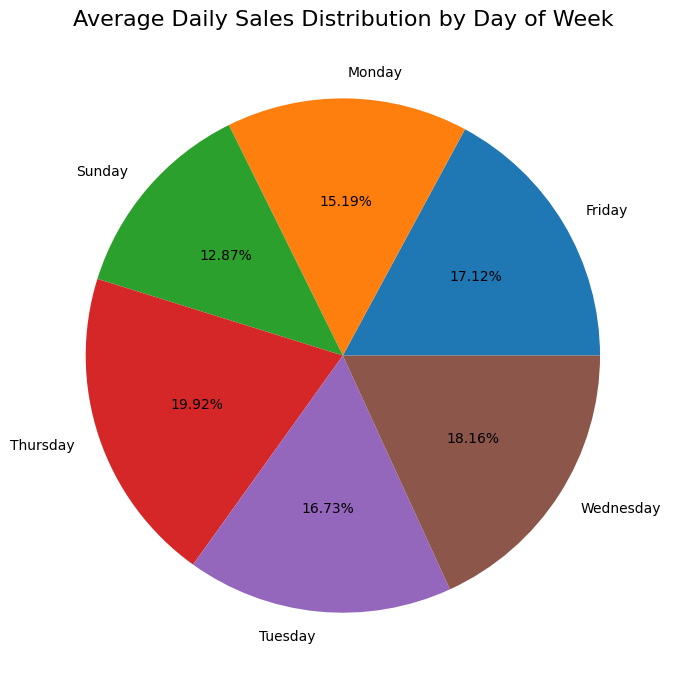

In [ ]:
# Extract day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Calculate average daily sales
daily_sales = df.groupby('DayOfWeek')['Quantity'].mean()

# Plot the pie chart
daily_sales.plot(kind='pie', autopct='%.2f%%', figsize=(7, 7))
plt.title("Average Daily Sales Distribution by Day of Week", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()

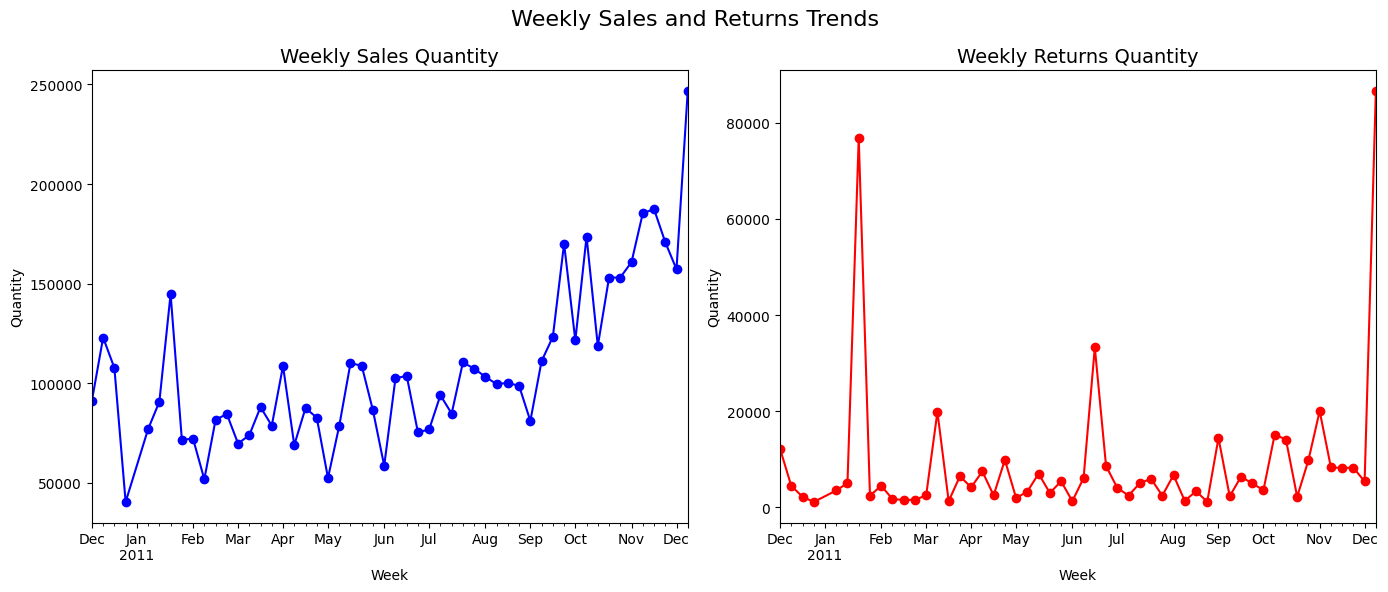

In [ ]:
# Extract week number for weekly analysis
df['Week'] = df['InvoiceDate'].dt.to_period('W')

# Calculate weekly sales and returns
weekly_sales = df[df['Quantity'] > 0].groupby('Week')['Quantity'].sum()
weekly_returns = df[df['Quantity'] < 0].groupby('Week')['Quantity'].sum().abs()

# Plot weekly sales and returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
weekly_sales.plot(kind='line', marker='o', ax=ax1, color='blue')
ax1.set_title("Weekly Sales Quantity", fontsize=14)
ax1.set_xlabel("Week")
ax1.set_ylabel("Quantity")
weekly_returns.plot(kind='line', marker='o', ax=ax2, color='red')
ax2.set_title("Weekly Returns Quantity", fontsize=14)
ax2.set_xlabel("Week")
ax2.set_ylabel("Quantity")
plt.suptitle("Weekly Sales and Returns Trends", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Check columns
print("Columns in the dataset:", df.columns)

# Step 2: Check for null or missing values in critical columns
print("Missing values in columns:\n", df.isnull().sum())

# Step 3: Check for 'InvoiceNo' existence and sample data
if 'InvoiceNo' not in df.columns:
    print("Error: 'InvoiceNo' column is missing!")
else:
    print("Sample 'InvoiceNo' data:\n", df['InvoiceNo'].head())

# Step 4: Ensure 'InvoiceDate' exists and is in correct format
if 'InvoiceDate' not in df.columns:
    print("Error: 'InvoiceDate' column is missing!")
else:
    print("Sample 'InvoiceDate' data before conversion:\n", df['InvoiceDate'].head())

# Convert 'InvoiceDate' to datetime
try:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    print("Converted 'InvoiceDate' to datetime format.")
except Exception as e:
    print("Error during 'InvoiceDate' conversion:", e)

# Step 5: Handle canceled transactions (InvoiceNo starting with 'C')
if 'InvoiceNo' in df.columns:
    df = df[~df['InvoiceNo'].str.startswith('C', na=False)]
    print("Filtered canceled transactions. Remaining rows:", len(df))

# Step 6: Check for missing CustomerID and Description
if 'CustomerID' in df.columns and 'Description' in df.columns:
    df = df.dropna(subset=['CustomerID', 'Description'])
    print("Dropped rows with missing CustomerID or Description. Remaining rows:", len(df))
else:
    print("Error: 'CustomerID' or 'Description' column is missing.")

# Step 7: Add derived columns
try:
    df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Calculate revenue
    print("Added 'Revenue' column.")
    df['Month'] = df['InvoiceDate'].dt.to_period('M')  # Extract month
    print("Added 'Month' column.")
    df['Week'] = df['InvoiceDate'].dt.to_period('W')  # Extract week
    print("Added 'Week' column.")
    df['Day of Week'] = df['InvoiceDate'].dt.day_name()  # Extract day of the week
    print("Added 'Day of Week' column.")
except Exception as e:
    print("Error during column addition:", e)

# Step 8: Final dataset info
print("Dataset after preprocessing:\n", df.head())
print("Data types:\n", df.dtypes)

Columns in the dataset: Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Date', 'Revenue', 'YearMonth', 'Day of Week', 'DayOfWeek',
       'Week', 'Month'],
      dtype='object')
Missing values in columns:
 Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Revenue        0
YearMonth      0
Day of Week    0
DayOfWeek      0
Week           0
Month          0
dtype: int64
Error: 'InvoiceNo' column is missing!
Sample 'InvoiceDate' data before conversion:
 0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]
Converted 'InvoiceDate' to datetime format.


<ipython-input-35-998a54ee4dbf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Dropped rows with missing CustomerID or Description. Remaining rows: 397884
Added 'Revenue' column.
Added 'Month' column.
Added 'Week' column.
Added 'Day of Week' column.
Dataset after preprocessing:
                            Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country        Date  Revenue YearMonth  \
0       2.55     17850.0  United Kingdom  2010-12-01    15.30   2010-12   
1       3.39     17850.0  United Kingdom  2010-12-01    20.34   2010-12   
2       2.75     17850.0  United Kingdom  2010-12-01    22.00   2010-12   
3       3.39     17850.0  United Kingdom  2010-12-01    20.34   20

# Yeni Bölüm

Optimal number of clusters: 2 with Silhouette Score: 0.43

Optimized RFM Cluster Summary:
         recency        frequency        monetary               
           mean median      mean median     mean   median count
cluster                                                        
0         28.77   18.0      6.72    5.0  2592.06  1898.52  1663
1        132.07   95.5      1.63    1.0   479.29   363.44  2506


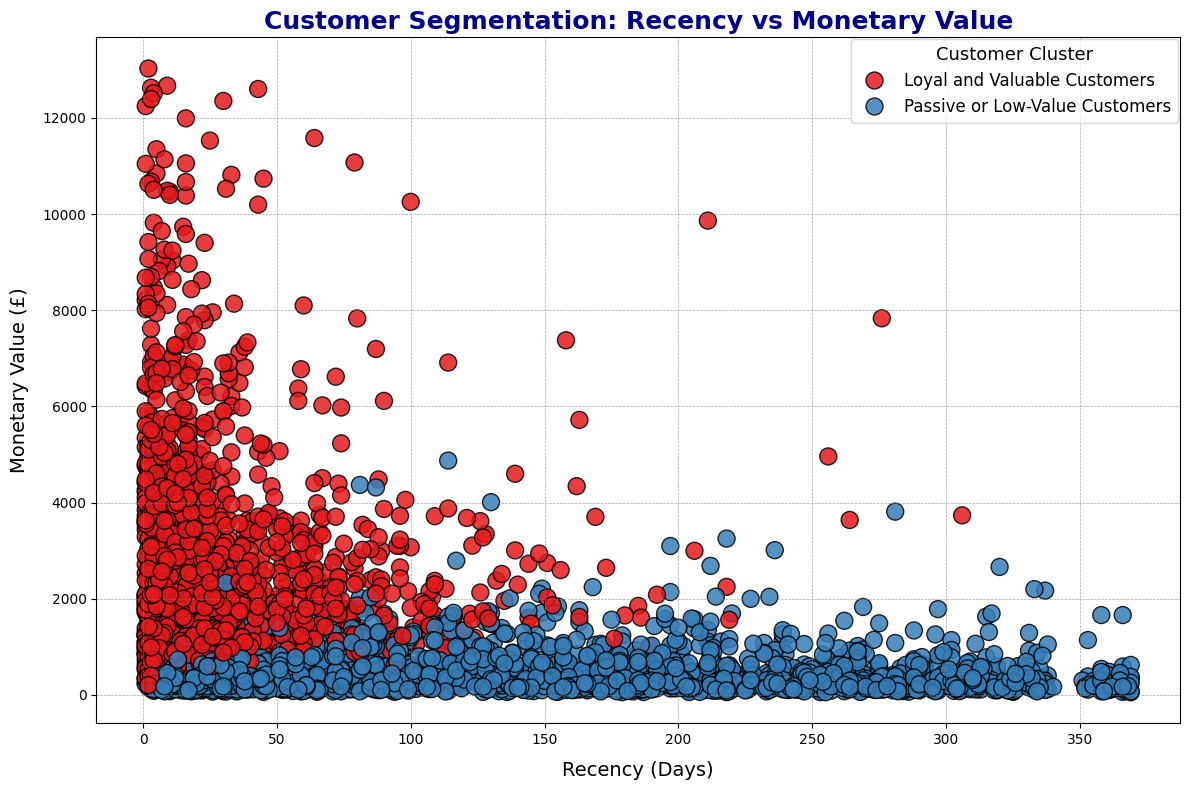

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('OnlineRetail.xlsx')

# Preprocess data
df.columns = df.columns.str.strip().str.replace(' ', '').str.lower()
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df = df.dropna(subset=['customerid', 'description']).copy()
df['revenue'] = df['quantity'] * df['unitprice']

# Remove negative or zero revenue
df = df[df['revenue'] > 0]

# RFM Calculation
snapshot_date = df['invoicedate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('customerid').agg(
    recency=('invoicedate', lambda x: (snapshot_date - x.max()).days),
    frequency=('invoiceno', 'nunique'),
    monetary=('revenue', 'sum')
)

# Remove outliers (1st and 99th percentiles)
for col in ['recency', 'frequency', 'monetary']:
    lower, upper = np.percentile(rfm[col], [1, 99])
    rfm = rfm[(rfm[col] >= lower) & (rfm[col] <= upper)]

# Log transformation for skewed data
rfm['recency_log'] = np.log1p(rfm['recency'])
rfm['frequency_log'] = np.log1p(rfm['frequency'])
rfm['monetary_log'] = np.log1p(rfm['monetary'])

# Scaling the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency_log', 'frequency_log', 'monetary_log']])

# Determine optimal clusters using Silhouette Score
best_k = 0
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, cluster_labels)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal number of clusters: {best_k} with Silhouette Score: {best_score:.2f}")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Summarize RFM Clusters
cluster_summary = rfm.groupby('cluster').agg({
    'recency': ['mean', 'median'],
    'frequency': ['mean', 'median'],
    'monetary': ['mean', 'median', 'count']
}).round(2)

print("\nOptimized RFM Cluster Summary:\n", cluster_summary)

# Enhanced Visualization with Custom Legend Labels
plt.figure(figsize=(12, 8))

# Define custom cluster labels
cluster_labels = {
    0: "Loyal and Valuable Customers",
    1: "Passive or Low-Value Customers"
}

# Map cluster numbers to labels
rfm['cluster_label'] = rfm['cluster'].map(cluster_labels)

# Scatterplot for clusters using custom labels
sns.scatterplot(
    data=rfm,
    x='recency',
    y='monetary',
    hue='cluster_label',  # Use custom labels for hue
    palette='Set1',
    s=150,
    alpha=0.85,
    edgecolor='k'
)

# Customizing the plot
plt.title('Customer Segmentation: Recency vs Monetary Value', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Recency (Days)', fontsize=14, labelpad=10)
plt.ylabel('Monetary Value (£)', fontsize=14, labelpad=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjusting legend to ensure all clusters are shown with custom labels
plt.legend(
    title='Customer Cluster',
    fontsize=12,
    title_fontsize=13,
    loc='upper right',  # Adjust as needed
    bbox_to_anchor=(1, 1),  # Move the legend slightly outside the plot
    borderaxespad=0.1
)

plt.tight_layout()
plt.show()


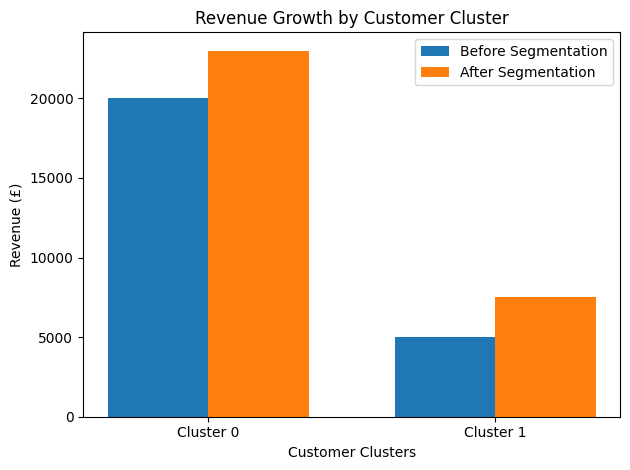

In [ ]:
import matplotlib.pyplot as plt

clusters = ['Cluster 0', 'Cluster 1']
revenue_before = [20000, 5000]  # Example values
revenue_after = [23000, 7500]  # Example values

bar_width = 0.35
x = range(len(clusters))

plt.bar(x, revenue_before, width=bar_width, label='Before Segmentation')
plt.bar([p + bar_width for p in x], revenue_after, width=bar_width, label='After Segmentation')

plt.xlabel('Customer Clusters')
plt.ylabel('Revenue (£)')
plt.title('Revenue Growth by Customer Cluster')
plt.xticks([p + bar_width / 2 for p in x], clusters)
plt.legend()
plt.tight_layout()
plt.show()

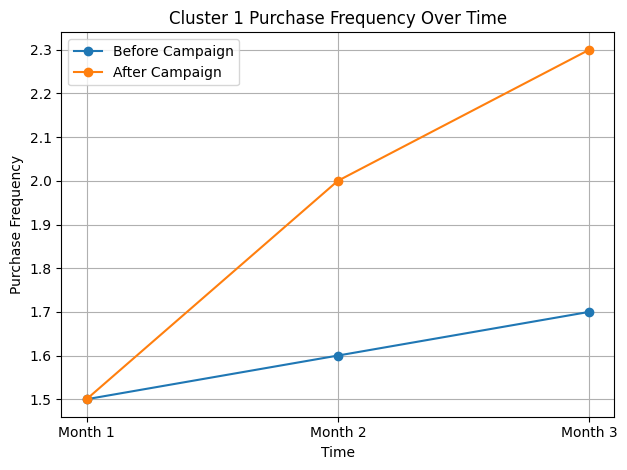

In [ ]:
months = ['Month 1', 'Month 2', 'Month 3']
freq_before = [1.5, 1.6, 1.7]  # Example values
freq_after = [1.5, 2.0, 2.3]  # Example values

plt.plot(months, freq_before, marker='o', label='Before Campaign')
plt.plot(months, freq_after, marker='o', label='After Campaign')

plt.xlabel('Time')
plt.ylabel('Purchase Frequency')
plt.title('Cluster 1 Purchase Frequency Over Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

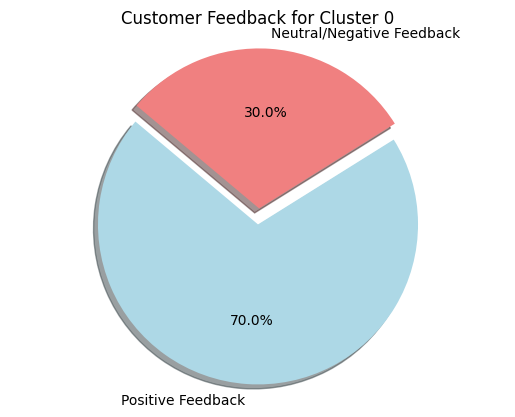

In [ ]:
labels = ['Positive Feedback', 'Neutral/Negative Feedback']
sizes = [70, 30]  # Example percentages
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Feedback for Cluster 0')
plt.axis('equal')
plt.show()

In [ ]:
pip install diagrams

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 40.0 MB/s eta 0:00:00


In [ ]:
from graphviz import Digraph

# Create a directed graph
flow = Digraph(format='png', node_attr={'style': 'filled', 'shape': 'box', 'color': 'lightblue'})

# Add nodes for each step
flow.node('A', 'Data Collection and Preprocessing\n(Missing values, Outliers)', color='lightyellow')
flow.node('B', 'RFM Calculation and Feature Engineering\n(Recency, Frequency, Monetary)', color='lightgreen')
flow.node('C', 'Clustering with K-Means Algorithm\n(Silhouette Score to Optimize Clusters)', color='lightblue')
flow.node('D', 'Cluster Analysis and Insights\n(Understanding Customer Behavior)', color='lightcoral')
flow.node('E', 'Loyal and Valuable Customers\n(Retention Strategies)', color='gold')
flow.node('F', 'Passive or Low-Value Customers\n(Reactivation Campaigns)', color='gold')
flow.node('G', 'Business Impact\n(Increased Revenue, Satisfaction, Cost Savings)', color='lightgrey')

# Add edges between nodes
flow.edges([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('D', 'F'),
    ('E', 'G'),
    ('F', 'G')
])

# Save and render the flow diagram
flow.render('retail_nexus_flow', view=True)

'retail_nexus_flow.png'

In [ ]:
from diagrams import Diagram, Cluster
from diagrams.generic.place import Datacenter
from diagrams.gcp.analytics import DataCatalog
from diagrams.programming.language import Python
from diagrams.onprem.analytics import Tableau
from diagrams.onprem.client import Users
from diagrams.onprem.monitoring import PrometheusOperator



# Define the diagram
with Diagram("Retail Nexus Process Flow", show=True, direction="LR"):  # Top-to-bottom for better readability

    # Define icons and steps
    data_collection = Datacenter("Data Collection\n& Cleaning")
    rfm_calculation = DataCatalog("RFM Analysis\n& Features")
    clustering = Python("K-Means Clustering\n(Optimize Groups)")
    insights = Tableau("Cluster Insights\n& Actions")
    loyal_customers = Users("Loyal Customers\n(Retention)")
    passive_customers = Users("Passive Customers\n(Reactivation)")
    business_impact = PrometheusOperator("Business Impact\n(Revenue, Savings)")

    # Define connections between nodes
    data_collection >> rfm_calculation >> clustering >> insights
    insights >> loyal_customers >> business_impact
    insights >> passive_customers >> business_impact

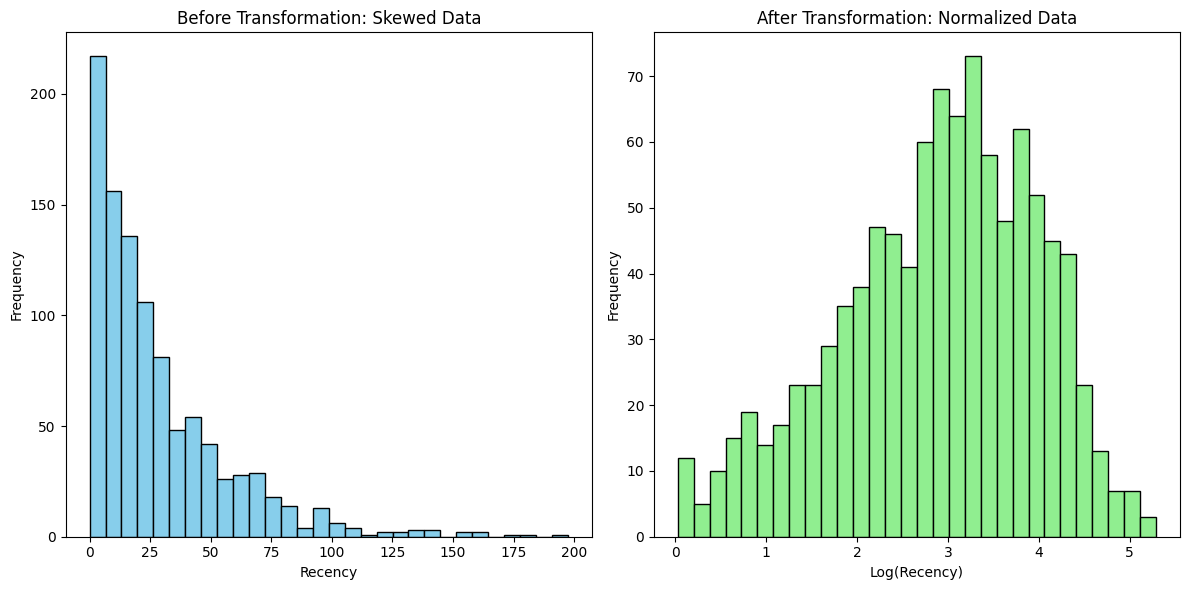

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (Recency before and after transformation)
original_data = np.random.exponential(scale=30, size=1000)  # Simulating skewed data
transformed_data = np.log1p(original_data)  # Log transformation

# Plot before-and-after histograms
plt.figure(figsize=(12, 6))

# Before transformation
plt.subplot(1, 2, 1)
plt.hist(original_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Before Transformation: Skewed Data')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='lightgreen', edgecolor='black')
plt.title('After Transformation: Normalized Data')
plt.xlabel('Log(Recency)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

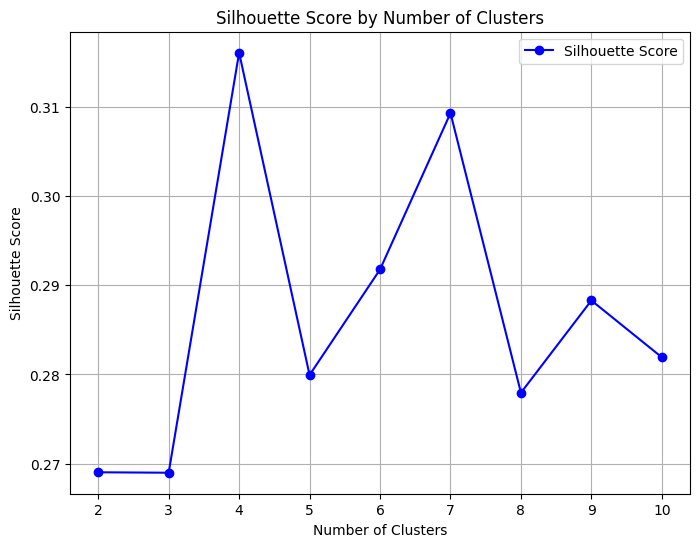

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Example data (scaled RFM features)
np.random.seed(42)
scaled_data = np.random.rand(100, 3)  # Simulating scaled RFM features

# Calculate Silhouette Scores for different cluster numbers
scores = []
clusters = range(2, 11)

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    scores.append(silhouette_score(scaled_data, labels))

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(clusters, scores, marker='o', color='b', label='Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

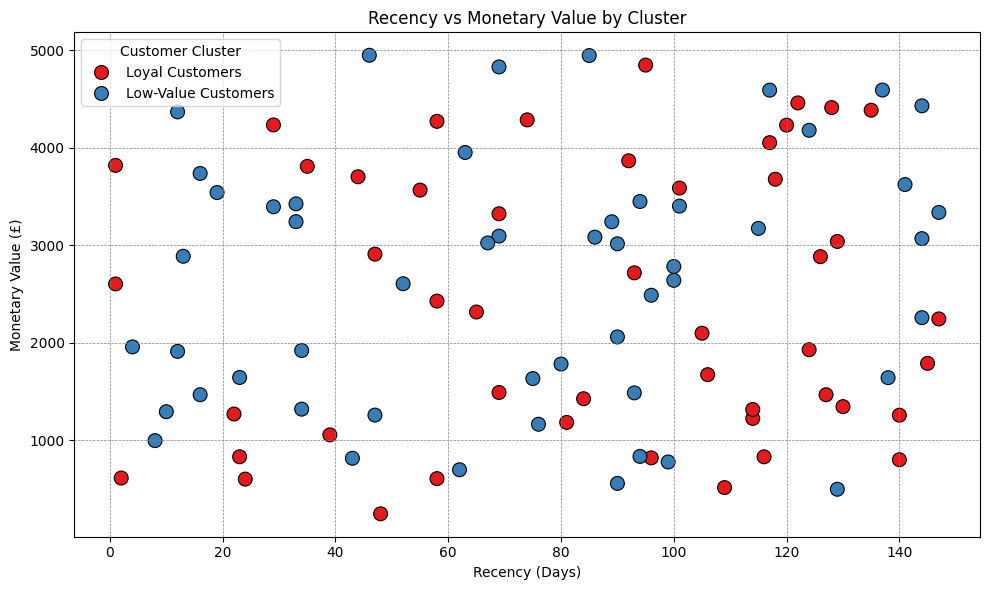

In [ ]:
import seaborn as sns
import pandas as pd

# Simulated cluster data
data = pd.DataFrame({
    'Recency': np.random.randint(1, 150, 100),
    'Monetary': np.random.randint(100, 5000, 100),
    'Cluster': np.random.choice(['Loyal Customers', 'Low-Value Customers'], 100)
})

# Scatterplot of Recency vs Monetary value by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Recency',
    y='Monetary',
    hue='Cluster',
    palette='Set1',
    s=100,
    edgecolor='k'
)
plt.title('Recency vs Monetary Value by Cluster')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value (£)')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Customer Cluster')
plt.tight_layout()
plt.show()